<a href="https://colab.research.google.com/github/carlosfmorenog/CMM536/blob/master/CMM536_Topic_3/CMM536_T3_Lab_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 3 Laboratory SOLVED

In this activity you will have the opportunity to understand better how to import and manipulate images in Python.

## Installing the necessary packages

To work with images in Python, we will use packages such as `numpy`, `OpenCV` and `matplotlib` (all of them are part of Colab, therefore no need to install).

## Importing the modules

Now we will import the packages, functions and classes we will use for this activity:

* The first one is `OpenCV`, which is refered to as `cv2`:

In [ ]:
import cv2

* To handle and perform operations on the images, we need `numpy`, which can be imported by executing the command we saw in class:

In [ ]:
import numpy as np

* To plot the images, we will use `matplotlib.pyplot` assigning the pseudonym `plt` for short

In [ ]:
import matplotlib.pyplot as plt

## Working with grayscale images

### Loading and importing the image

#### Loading the image from your computer into google colab's disk

First, go to moodle and from the section containing the material for this week, download image `logo.png`.

Then, run the following cell to load the image into the notebook's disk:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving logo.png to logo.png


#### Importing the image as a numpy array using open cv

To import the Python logo as a `numpy array` into a variable called `img`, we will use the `imread`command from `OpenCV`.

You can find the full documentation of the command [here](https://docs.opencv.org/4.2.0/d4/da8/group__imgcodecs.html), but I strongly recommend you to check the [OpenCV Python Tutorials](https://opencv24-python-tutorials.readthedocs.io/en/latest/) whenever you have a doubt of any command, as they are more suitable and easier to understand that the `OpenCV` original documentation which is designed for C.

In [ ]:
## Loading the logo as a grayscale image
img = cv2.imread("/content/logo.png",0)

Notice that the `imread` function has two parameters: the **image file** to load and a **flag** (0/1) which indicates if we need to load the image as grayscale/colour respectively.

Check the type and shape of the image to verify that you have a `numpy` array of size $75 \times 75$

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(75, 75)

What would happen if we print `img`? Are we able to see it? Run the following cell to find out!

In [ ]:
print(img)

[[234 246 246 ... 246 246 234]
 [243 255 255 ... 255 255 242]
 [243 255 255 ... 255 255 242]
 ...
 [243 255 255 ... 255 255 242]
 [243 255 255 ... 255 255 242]
 [234 246 246 ... 246 246 234]]


Notice that we only see a bunch of numbers in an array. This is because when printing the variable, Python automatically assumes that we want to visualise the values of the pixels and not the image itself.

To show the actual image, we can use either the `cv2.imshow` function or the `plt.imshow` function (from the `matplotlib.pyplot` library).

In [ ]:
# Option 1: Don't use this in Colab as it doesn't work
cv2.imshow('logo',img)
cv2.waitKey()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


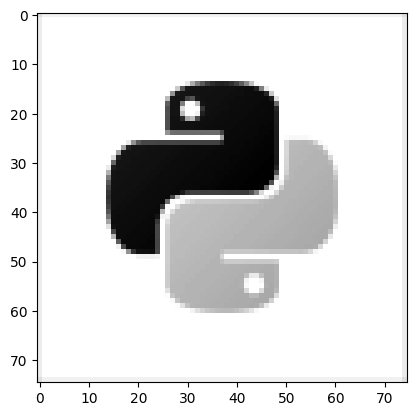

In [ ]:
# Option 2: Use this one instead
plt.imshow(img, cmap='gray')

The first option will show the image in a pop-up window which is prone to crash, while the second one will show you the image within a coordinate plane and within the notebook.

However, the image does not appear in grayscale as `plt` attempts to use colours to show you the image with a better contrast.

To avoid the yellow background, you can use the following setting:

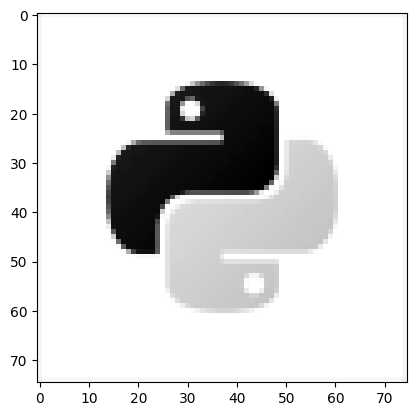

In [ ]:
plt.imshow(img, cmap='Greys_r')

### Locating the value of pixels

Notice that the image is shown with a coordinate plane which gives us an idea of the positions of the pixels within the logo.

Given that this is a $75 \times 75$ image, we can access different positions of the image to see their value.

For instance, to see the value of the **left-top** pixel, we can use the following command (The first zero corresponds to the y-axis/rows and the second zero corresponds to the x-axis/column):

In [ ]:
print(img[0,0])

234


We can use the same command to see different positions of the image.

For instance, you can see the value of the other corners or some values from the two pythons.

In [ ]:
## Use this cell to print the values of different pixels
print(img[50,40])

222


Take note of the approximate values corresponding to the two pythons. We will use this information later!

### Changing the value of pixels

We can change the top-left pixel of the img in `img` to black by issuing the following code:

[[  0 246 246 ... 246 246 234]
 [243 255 255 ... 255 255 242]
 [243 255 255 ... 255 255 242]
 ...
 [243 255 255 ... 255 255 242]
 [243 255 255 ... 255 255 242]
 [234 246 246 ... 246 246 234]]


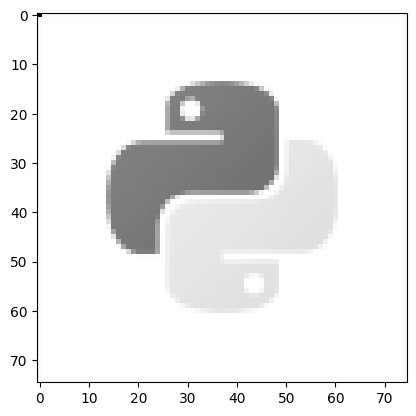

In [ ]:
img[0,0]=0
print(img)
plt.imshow(img, cmap='Greys_r')

### Trimming the image

We can also slice the image and create a new, smaller one.

For instance, say that you want to produce a new image only with the face of the dark-coloured python.

We start from the **row 15** to the **row 26**, and then from the **column 24** to the **column 39**.

Now, we can use the following code to produce a trimmed image called `img_trimdark` with the face of the dark-coloured python.

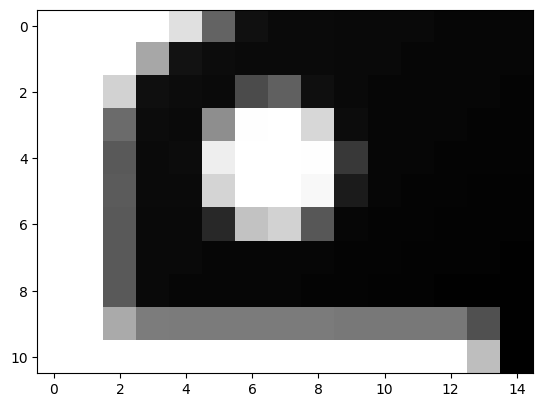

In [ ]:
img_trimdark = img[15:26,24:39] # rows go first, columns go after
plt.imshow(img_trimdark, cmap='Greys_r')

Now it's your turn to create a trimmed image called `img_trimlight` with the face of the light-coloured python.

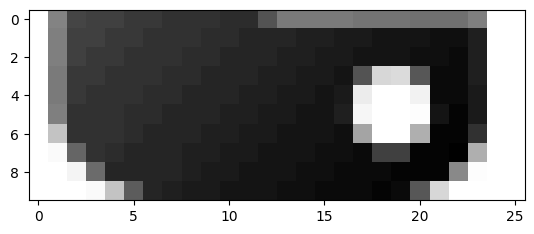

In [ ]:
## Use this cell to create img_trimlight
img_trimdark = img[50:60,25:51] # rows go first, columns go after
plt.imshow(img_trimdark, cmap='Greys_r')

### Inverting the image

You can also create the *negative* of an image by doing the following:

[[255   9   9 ...   9   9  21]
 [ 12   0   0 ...   0   0  13]
 [ 12   0   0 ...   0   0  13]
 ...
 [ 12   0   0 ...   0   0  13]
 [ 12   0   0 ...   0   0  13]
 [ 21   9   9 ...   9   9  21]]


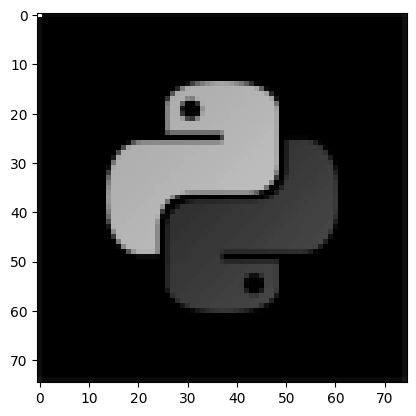

In [ ]:
img_neg = 255 - img
print(img_neg)
plt.imshow(img_neg, cmap='Greys_r')

By subtracting $255$ minus the original image, what we are doing is converting all values into their opposite ones (in the gray scale).

### Transposing the image

As seen in the previous lab, there is a mathematical operation called **transpose** which lets you exchange the columns and the rows of a matrix. This function is also included in the numpy module, and it can be applied to image arrays as well:

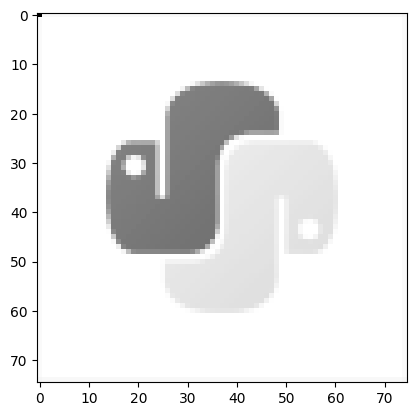

In [ ]:
img_trans = img.transpose()
plt.imshow(img_trans, cmap='Greys_r')

Notice that the new image is turned 90 degrees counter-clockwise and has also been flipped vertically.

### Resizing the image

`OpenCV`also contains a pre-defined function to resize the image by indicating the new width/height.

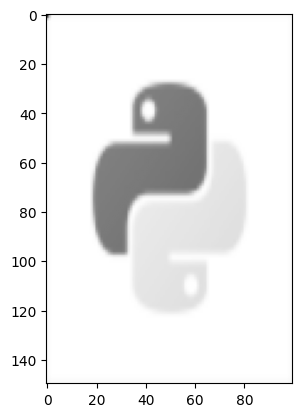

In [ ]:
img_resize = cv2.resize(img, (100, 150))
plt.imshow(img_resize, cmap='Greys_r')

Try different values in the tuple (second parameter of the function) to see different results.

### Normalising the image

To convert the image from standard to normalised grayscale, we simply need to divide the `numpy`array by 255 as follows

[[0.         0.96470588 0.96470588 ... 0.96470588 0.96470588 0.91764706]
 [0.95294118 1.         1.         ... 1.         1.         0.94901961]
 [0.95294118 1.         1.         ... 1.         1.         0.94901961]
 ...
 [0.95294118 1.         1.         ... 1.         1.         0.94901961]
 [0.95294118 1.         1.         ... 1.         1.         0.94901961]
 [0.91764706 0.96470588 0.96470588 ... 0.96470588 0.96470588 0.91764706]]


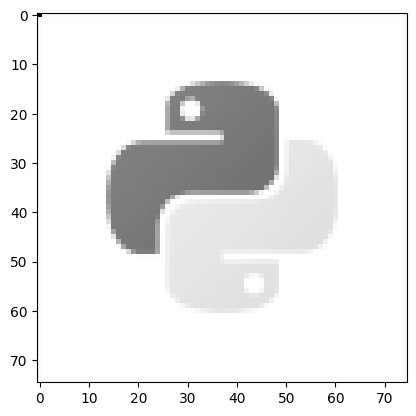

In [ ]:
img_norm = img/255
print(img_norm)
plt.imshow(img_norm, cmap='Greys_r')

Notice that nothing has changed visually, just the values!

### Binarising the image

#### The long and hard way (but necessary to understand and practice Python)

Remember you wrote down the values of the pixels of both pythons? Now it's time to put this information into use!

Before using the pre-built function, we will design our own binarisation function to understand how it works!

Take into account the following:
1. Your function needs two inputs: the **image to binarise** and the **threshold**, which is a cut-off value between 0 and 255.
2. Your function has to iterate the `numpy` array for all rows and columns of the image (double loop).
3. For each position, the system has to compare the value of the pixel with the threshold. If the value of the pixel is *smaller* than the threshold, then the function changes the value of the pixel to zero. Else, the function changes it to 255.
4. To avoid losing the original image, create a copy and change the copy, not the original one! (hint: use the `.copy()` function to do so).
5. Notice that depending on the threshold value selected, you will get different outputs!

In [ ]:
## Use this cell to create the binarisation function
def binarise(img, threshold):
    '''This function biniarises an image in a numpy array according to the specified threshold'''
    img_bin = img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x,y]<threshold:
                img_bin[x,y]=0
            else:
                img_bin[x,y]=255
    plt.imshow(img_bin, cmap='Greys_r')
    return img_bin

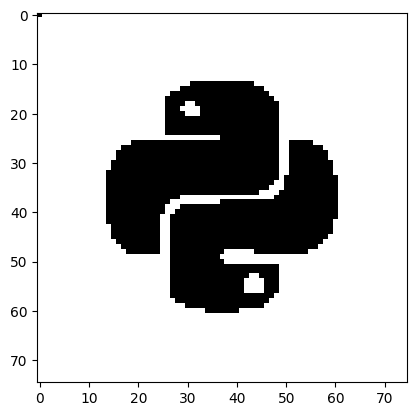

In [ ]:
## Use this cell to execute the binarise function and show both pythons in black.
img_bin1 = binarise(img, 220)

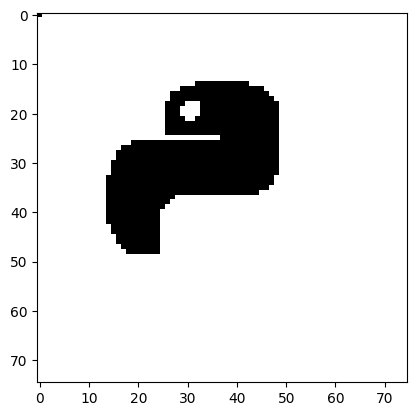

In [ ]:
## Use this cell to execute the binarise function to show only the dark python and "disappear" the light one.
img_bin2 = binarise(img, 200)

#### The cv2 option

Click [here](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html) to see a very comprehensive tutorial on how to use the binarisation function contained in `OpenCV`.

Then apply the function to do the same things that you did with your function.

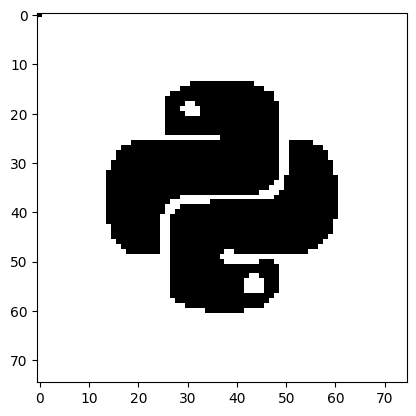

In [ ]:
## Use this cell to execute the cv2.threshold function and show both pythons in black.
_,thresh1 = cv2.threshold(img,220,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='Greys_r')

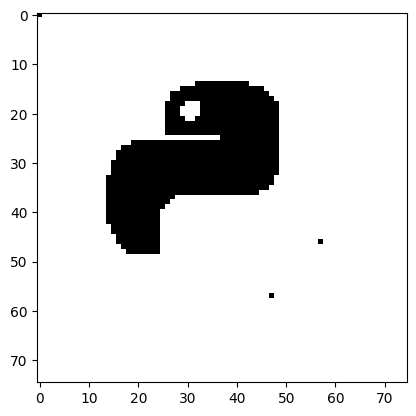

In [ ]:
## Use this cell to execute the cv2.threshold function and show only the dark and "disappear" the light one. It works slightly different!
_,thresh2 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap='Greys_r')

### Saving the image

You can save any of the images produced in this tutorial by using either the `cv2.imwrite` or the `plt.imsave` command.

For instance, to save the transpose image, use the following command:

In [ ]:
cv2.imwrite('logotrans.png',img_trans)

True

I recommend to use `cv2.imwrite`, given that the `plt` option will save it with the yellow background by default.

In this colab version, the files will be saved in your online disk. You can right-click and download it afterwards

## Bonus

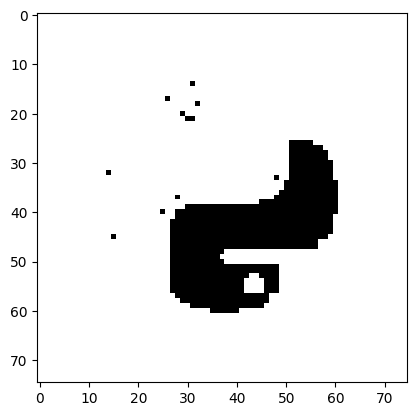

In [ ]:
## Use this cell to show only the lighter python in black and "disappear" the darker one.
## You can pre-process the image as you want and implement any binarisation function.

## I implement two binarisation functions:
# The first one turns all near-white pixels into white (so that all background pixels are 255).
# The second one ignores white pixels and binarises inversely (so that the dark python gets turned white,
# but the background is ignored).
def binarise_w(img, threshold):
    '''This function biniarises an image in a numpy array according to the specified threshold'''
    img_bin = img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x,y]>threshold:
                img_bin[x,y]=255
    plt.imshow(img_bin, cmap='Greys_r')
    return img_bin
def binarise_inv(img, threshold):
    '''This function biniarises an image in a numpy array according to the specified threshold'''
    img_bin = img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x,y]!=255:
                if img[x,y]>threshold:
                    img_bin[x,y]=0
                else:
                    img_bin[x,y]=255
    plt.imshow(img_bin, cmap='Greys_r')
    return img_bin

# I first run the original binarisation function to turn the background white.
img_bin3 = binarise_w(img, 215)
# Then I run the new binarisation function to convert the lighter python into a dark one
# And the dark one into white, without touching the background.
img_bin3 = binarise_inv(img_bin3, 200)

Note that I could use a morphology operation (as the ones seen in class) to improve the result

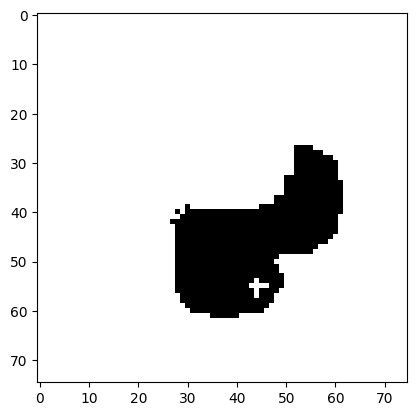

In [ ]:
opening = cv2.morphologyEx(img_bin3, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_CROSS,(4,4)))
plt.imshow(opening, cmap='Greys_r')

You can find more information on how to apply morphological operations in Python [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

## In case you are curious, how does the image look in colour?

[[[234 234 234]
  [246 246 246]
  [246 246 246]
  ...
  [246 246 246]
  [246 246 246]
  [234 234 234]]

 [[243 243 243]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [242 242 242]]

 [[243 243 243]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [242 242 242]]

 ...

 [[243 243 243]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [242 242 242]]

 [[243 243 243]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [242 242 242]]

 [[234 234 234]
  [246 246 246]
  [246 246 246]
  ...
  [246 246 246]
  [246 246 246]
  [234 234 234]]]
(75, 75, 3)


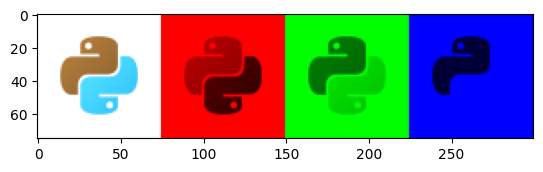

In [ ]:
## Load the image with the flag in 1 (colour mode)
img_color = cv2.imread("logo.png",1)
## Print the image (you will see many matrices as there are multiple dimensions)
print(img_color)
## Print the shape (notice now it has 3 dimensions)
print(img_color.shape)
## Create three copies of the image
img_R = img_color.copy()
img_G = img_color.copy()
img_B = img_color.copy()
## In each copy, only access the values of interest
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
## Concatenate the original image to the three chanels
img_RGB = np.concatenate((img_color, img_R, img_G, img_B), axis=1)
## Show the images
plt.imshow(img_RGB)